In [340]:
import pandas as pd
import numpy as np 
import requests 
import tweepy
import json
import matplotlib.pyplot as plt

## Gathering Data 

- 1) Twitter Archive 

In [341]:


twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

- 2) Image Predictions file

In [342]:
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
open('image_predictions.tsv', 'wb').write(r.content)


335079

In [343]:
images_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')

- 3) Tweet_count

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

tweet_ids = twitter_archive.tweet_id.values

with open('tweet_json.txt', 'w') as output:
    for tweet_id in tweet_ids:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, output)
            output.write('\n')
        except tweepy.TweepError:
            print('Error: tweet missing')

In [344]:
response = requests.get("https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt")
open('tweet-json.txt', 'wb').write(response.content)
tweets_list =[]

with open('tweet-json.txt') as json_file:
    for line in json_file:
    
        tweets_dict = {}
        tweets_json = json.loads(line)
        
        try:
            tweets_dict['tweet_id'] = tweets_json['extended_entities']['media'][0]['id']
        except:
            tweets_dict['tweet_id'] = 'na'

        tweets_dict['retweet_count'] = tweets_json['retweet_count']
        tweets_dict['favorite_count'] = tweets_json['favorite_count']
        
        tweets_list.append(tweets_dict)
tweets_df = pd.DataFrame(tweets_list)


In [345]:
tweets_df.head()

,tweet_id,retweet_count,favorite_count
0,892420639486877696,8853,39467
1,892177413194625024,6514,33819
2,891815175371796480,4328,25461
3,891689552724799489,8964,42908
4,891327551943041024,9774,41048


## Assessment 
1) Twitter_archive


In [346]:
twitter_archive.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2351    False
2352    False
2353    False
2354    False
2355    False
Length: 2356, dtype: bool

In [347]:
twitter_archive.loc[twitter_archive['rating_denominator']!= 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [348]:
twitter_archive.loc[twitter_archive['rating_denominator']< 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


In [349]:
twitter_archive.loc[twitter_archive['rating_denominator'] >20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395...,45,50,None,None,None,None,None
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845...,60,50,a,None,None,None,None
1433,697463031882764288,NaN,NaN,2016-02-10 16:51:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Wednesday here's a bucket of pups. 44/40...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697463031...,44,40,None,None,None,None,None
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684225744...,143,130,None,None,None,None,None


In [350]:
#values less than 10 will remain
twitter_archive.loc[twitter_archive['rating_numerator']<= 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
113,870726314365509632,8.707262e+17,16487760.0,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
165,860177593139703809,NaN,NaN,2017-05-04 17:01:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Ohboyohboyohboyohboyohboyohboyo...,7.616730e+17,4.196984e+09,2016-08-05 21:19:27 +0000,https://twitter.com/dog_rates/status/761672994...,10,10,None,None,None,None,None
212,851861385021730816,NaN,NaN,2017-04-11 18:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @eddie_coe98: Thanks @dog_rates completed m...,8.482894e+17,3.410211e+08,2017-04-01 21:42:03 +0000,https://twitter.com/eddie_coe98/status/8482893...,10,10,None,None,None,None,None
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [351]:
twitter_archive.loc[twitter_archive['rating_numerator']> 20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


# Quality issues
- The column named 'name' and 'text must be more indicating so they will be renamed as 'dog_name' and  'tweet_text' respectively.
- time_stamp type should be datetime

- The denominator which values which not equal 10 must be modified
- There are 78 tweet replies which need to be removed. This will ensure there are not two rows corresponding to the same tweet, i.e. holding to the definition of tidy data which requires each row to represent a unique entry.
- There 23 denominator values which are not euqual to ten
   - The zero values will be removed and the other values less than 10 will be rounded to 10
   - The values more than 20 will be removed 
- There numerators rating values which are less than 10 will remain and the values more than 20 will be removed
# Tidiness issues


- Reducing the 4 columns (doggo,puppo,pupper,floofer) to one column (dog_category)

2) Images_predictions



In [352]:
images_predictions.head(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [353]:
images_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


# Quality issues
- P1 columns must be renamed to more indicating names
- P2 & P3 related columns will be removed as my analysis depend on the first prediction
- Removing jpg_url column because it’s already in the first file
- Removing false values from prediction dog column because it has no use
- Removing the dog prediction column

3) Tweet Count 

In [354]:
tweets_df.head()

,tweet_id,retweet_count,favorite_count
0,892420639486877696,8853,39467
1,892177413194625024,6514,33819
2,891815175371796480,4328,25461
3,891689552724799489,8964,42908
4,891327551943041024,9774,41048


In [355]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


# Tidiness
- The type of the tweet_id column should be changed into int64 so the merge can be done

# Data Cleaning

# 1) Tweet_archive
- Making a copy of the twitter archive dataframe


In [356]:
twitter_archive_clean = twitter_archive.copy()

# Define 
- Renaming name and text columns to more indicating names


In [357]:
twitter_archive_clean.rename(columns={'name':'dog_name',
                                     'text':'tweet_text'},inplace=True)

In [358]:
#test
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,tweet_text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


# Define 
- Changing the type of timestamp column to datetime


In [359]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive['timestamp'])


In [360]:
#test
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   tweet_text                  2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

- Creating a new column called dog_category

In [361]:
twitter_archive_clean['dog_category'] = 'NaN'


In [362]:
for i in range(0, len(twitter_archive_clean.index)):
    if twitter_archive_clean.loc[i, 'doggo'] == 'doggo':
        twitter_archive_clean.loc[i, 'dog_category'] = 'doggo'
    elif twitter_archive_clean.loc[i, 'floofer'] == 'floofer':
        twitter_archive_clean.loc[i, 'dog_category'] = 'floofer'
    elif twitter_archive_clean.loc[i, 'pupper'] == 'pupper':
        twitter_archive_clean.loc[i, 'dog_category'] = 'pupper'
    elif twitter_archive_clean.loc[i, 'puppo'] == 'puppo':
        twitter_archive_clean.loc[i, 'dog_category'] = 'puppo'
    else:
        twitter_archive_clean.loc[i, 'dog_category'] = 'None'

In [363]:
multi_cat_list = []

for i in range(0, len(twitter_archive_clean.index)):
    if twitter_archive_clean.doggo[i] == 'doggo' and (twitter_archive_clean.floofer[i] == 'floofer' \
                                                   or twitter_archive_clean.pupper[i] == 'pupper'\
                                                   or twitter_archive_clean.puppo[i] == 'puppo'):
        multi_cat_list.append(i)

print(multi_cat_list)
print(len(multi_cat_list))

[191, 200, 460, 531, 565, 575, 705, 733, 778, 822, 889, 956, 1063, 1113]
14


In [364]:
twitter_archive_clean.loc[180]

tweet_id                                                     857062103051644929
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-04-26 02:41:43+00:00
source                        <a href="http://twitter.com/download/iphone" r...
tweet_text                    RT @AaronChewning: First time wearing my @dog_...
retweeted_status_id                                                 8.57061e+17
retweeted_status_user_id                                            5.87097e+07
retweeted_status_timestamp                            2017-04-26 02:37:47 +0000
expanded_urls                 https://twitter.com/AaronChewning/status/85706...
rating_numerator                                                             13
rating_denominator                                                           10
dog_name                                

In [365]:
twitter_archive_clean.loc[435]

tweet_id                                                     820446719150292993
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-01-15 01:45:15+00:00
source                        <a href="http://twitter.com/download/iphone" r...
tweet_text                    RT @dog_rates: This is Peaches. She's the ulti...
retweeted_status_id                                                 8.00141e+17
retweeted_status_user_id                                            4.19698e+09
retweeted_status_timestamp                            2016-11-20 00:59:15 +0000
expanded_urls                 https://twitter.com/dog_rates/status/800141422...
rating_numerator                                                             13
rating_denominator                                                           10
dog_name                                

In [366]:
# Creating rows for the multiple dog_category
for i in multi_cat_list:
    twitter_archive_clean.loc[i,'dog_category'] = 'multiple'


In [367]:
#Test
twitter_archive_clean.dog_category.value_counts()

None        1976
pupper       245
doggo         83
puppo         29
multiple      14
floofer        9
Name: dog_category, dtype: int64

In [368]:
#Removing the columns of the dog category
twitter_archive_clean.drop('doggo', axis=1, inplace=True)
twitter_archive_clean.drop('puppo', axis=1, inplace=True)
twitter_archive_clean.drop('floofer', axis=1, inplace=True)
twitter_archive_clean.drop('pupper', axis=1, inplace=True)


In [369]:
twitter_archive_clean.dog_category.unique()

array(['None', 'doggo', 'puppo', 'pupper', 'floofer', 'multiple'],
      dtype=object)

In [370]:
twitter_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,tweet_text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_category
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None


# Define
- Denominator Column Modification

In [371]:
#The row with with denominator 0 will be removed
twitter_archive_clean.drop(twitter_archive_clean[twitter_archive_clean['rating_denominator']== 0 ].index,inplace=True)

In [372]:
#The row with with denominator less than 10 will be rounded to 10
  
twitter_archive_clean[twitter_archive_clean['rating_denominator']< 10] = 10

In [373]:
#The row with with denominator more than 20 will be removed
  
twitter_archive_clean.drop(twitter_archive_clean[twitter_archive_clean['rating_denominator']> 20 ].index,inplace=True)

In [374]:
#test 
twitter_archive_clean['rating_denominator'].value_counts()

10    2335
11       3
20       2
15       1
16       1
Name: rating_denominator, dtype: int64

In [375]:
#The rows with numerator_rating which equal more than 20 will be removed
twitter_archive_clean.drop(twitter_archive_clean[twitter_archive_clean['rating_numerator']> 20 ].index,inplace=True)

In [376]:
#test
twitter_archive_clean['rating_numerator'].value_counts()

12    558
11    464
10    463
13    351
9     158
8     102
7      55
14     54
5      37
6      32
3      19
4      17
2       9
1       8
0       2
15      2
17      1
20      1
Name: rating_numerator, dtype: int64

2) Image Predictions


In [377]:
# Making a copy of the data frame
images_predictions_clean = images_predictions.copy()

In [378]:
images_predictions_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


- Renaming the p1 related columns with more indexing name

In [379]:
images_predictions_clean.rename(columns = {'p1': 'prediction','p1_conf':'prediction_config','p1_dog':'prediction_dog'}, inplace = True)

In [380]:
#test
images_predictions_clean

,tweet_id,jpg_url,img_num,prediction,prediction_config,prediction_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [381]:
#Removing the p2 and p3 related columns because they are not indexing 
drop_column =['p2','p2_conf','p2_dog','p3','p3_conf','p3_dog']
for i in drop_column:
    images_predictions_clean.drop(i ,axis=1, inplace=True)
    

In [382]:
#test
images_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tweet_id           2075 non-null   int64  
 1   jpg_url            2075 non-null   object 
 2   img_num            2075 non-null   int64  
 3   prediction         2075 non-null   object 
 4   prediction_config  2075 non-null   float64
 5   prediction_dog     2075 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(2)
memory usage: 83.2+ KB


In [383]:
#Removing predictions with false value
images_predictions_clean.drop(images_predictions_clean[images_predictions_clean['prediction_dog']==False].index,inplace=True)

In [384]:
#test
images_predictions_clean.prediction_dog.value_counts()

True    1532
Name: prediction_dog, dtype: int64

- As a result of removing all the False values in dog prediction column so this we dont need that column anymore

In [385]:
#since the prediction_dog has only one value so its meaningless 
images_predictions_clean.drop('prediction_dog' ,axis=1, inplace=True)


In [386]:
#test
images_predictions_clean

,tweet_id,jpg_url,img_num,prediction,prediction_config
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311
...,...,...,...,...,...
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012


- jpg_url column exists already in twitter archive dataframe as expanded url

In [387]:

images_predictions_clean.drop('jpg_url' ,axis=1, inplace=True)


In [388]:
#test
images_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 2073
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tweet_id           1532 non-null   int64  
 1   img_num            1532 non-null   int64  
 2   prediction         1532 non-null   object 
 3   prediction_config  1532 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 59.8+ KB


In [389]:
tweets_df_clean = tweets_df.copy()

In [390]:
tweets_df_clean.retweet_count.value_counts()

1972     5
3652     5
83       5
146      4
61       4
        ..
8209     1
19       1
2068     1
30742    1
0        1
Name: retweet_count, Length: 1724, dtype: int64

In [391]:
tweets_df_clean.drop(tweets_df_clean[tweets_df_clean['tweet_id']=='na'].index,inplace=True)
tweets_df_clean = tweets_df_clean.reset_index()
del tweets_df_clean['index']
tweets_df_clean['tweet_id']=tweets_df_clean['tweet_id'].astype(np.int64)
tweets_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2073 non-null   int64
 1   retweet_count   2073 non-null   int64
 2   favorite_count  2073 non-null   int64
dtypes: int64(3)
memory usage: 48.7 KB


In [392]:
tweets_df_clean.value_counts()

tweet_id            retweet_count  favorite_count
892420639486877696  8853           39467             1
684800218777321474  1124           2979              1
683098811808518144  736            2361              1
683111392338034688  1034           3736              1
683142548005777412  1173           3162              1
                                                    ..
761672828462718981  33421          55016             1
761745343629422592  979            4707              1
761976704302714881  2310           5992              1
762035577168560129  17919          35400             1
666020881337073664  532            2535              1
Length: 2073, dtype: int64

# Merging the twitter_archive , images_predictions

In [393]:
combine1= pd.merge(twitter_archive_clean,images_predictions_clean,on='tweet_id',how='left')

In [394]:
combine1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,tweet_text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_category,img_num,prediction,prediction_config
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,1.0,Chihuahua,0.323581
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,1.0,Chihuahua,0.716012
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,2.0,basset,0.555712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2328,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,1.0,miniature_pinscher,0.560311
2329,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,1.0,Rhodesian_ridgeback,0.408143
2330,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,1.0,German_shepherd,0.596461
2331,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,1.0,redbone,0.506826


- matching the type of tweet_id seires in the first combination with the last data sheet

In [395]:
tweets_df_clean['tweet_id']=tweets_df_clean['tweet_id'].astype(np.int64)
combine1['tweet_id']=combine1['tweet_id'].astype(np.int64)

tweets_df_clean['tweet_id']=tweets_df_clean['tweet_id'].astype(int)
combine1['tweet_id']=combine1['tweet_id'].astype(int)

In [396]:
#Merging the combine1 data sheet with tweets_df sheets
twitter_archive_master = pd.merge(combine1,tweets_df_clean,on='tweet_id',how='left')

In [397]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2339 entries, 0 to 2338
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2339 non-null   int32  
 1   in_reply_to_status_id       75 non-null     float64
 2   in_reply_to_user_id         75 non-null     float64
 3   timestamp                   2339 non-null   object 
 4   source                      2339 non-null   object 
 5   tweet_text                  2339 non-null   object 
 6   retweeted_status_id         183 non-null    float64
 7   retweeted_status_user_id    183 non-null    float64
 8   retweeted_status_timestamp  183 non-null    object 
 9   expanded_urls               2284 non-null   object 
 10  rating_numerator            2339 non-null   int64  
 11  rating_denominator          2339 non-null   int64  
 12  dog_name                    2339 non-null   object 
 13  dog_category                2339 

In [398]:
twitter_archive_master.to_csv('twitter_archive_master.csv')

In [399]:
twitter_archive_clean.to_csv('clean_twitter_archive.csv')

In [400]:
images_predictions_clean.to_csv('clean_images_predictions.csv')

In [401]:
tweets_df_clean.to_csv('clean_tweets_count.csv')

In [402]:
twitter_archive_master.dog_category.value_counts()

None        1957
pupper       244
doggo         84
puppo         29
multiple      14
floofer        9
10             2
Name: dog_category, dtype: int64

In [403]:
#Removing the rows with dog_category = 10
twitter_archive_master.drop(twitter_archive_master[twitter_archive_master['dog_category']== 10 ].index,inplace=True)

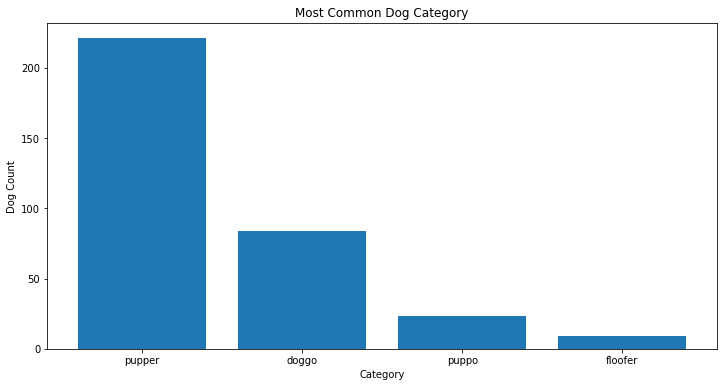

In [404]:
# Visualization of the dog category series using bar chart
dog_type = ['pupper', 'doggo', 'puppo', 'floofer']
dog_counts = [221, 84, 23, 9]

fig,ax = plt.subplots(figsize = (12,6))
ax.bar(dog_type, dog_counts, width = 0.8)
ax.set_ylabel('Dog Count')
ax.set_xlabel('Category')
plt.title("Most Common Dog Category")
plt.show()

In [405]:
# using the value_counts function to specify the most common popular dog acc to images
twitter_archive_master.prediction.value_counts()

golden_retriever      147
Labrador_retriever     98
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
silky_terrier           1
Japanese_spaniel        1
EntleBucher             1
standard_schnauzer      1
groenendael             1
Name: prediction, Length: 110, dtype: int64

In [406]:
twitter_archive_master.retweet_count.mean()

2332.065934065934

- The most popular dog is pupper
- The most popular dog according to predictions is golden_retriever      
- The retweet_count mean is 2451.3670886075947

In [407]:
twitter_archive_master.favorite_count.mean()              

6942.186813186813

In [408]:
twitter_archive_master.prediction_config.mean()           

0.61334431441738

In [409]:
twitter_archive_master.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,img_num,prediction_config,retweet_count,favorite_count
count,2.337000e+03,7.300000e+01,7.300000e+01,1.810000e+02,1.810000e+02,2337.000000,2337.000000,1519.000000,1519.000000,91.000000,91.000000
mean,-1.335276e+07,7.408258e+17,2.152128e+16,7.717794e+17,1.241698e+16,10.700899,10.014549,1.214615,0.613344,2332.065934,6942.186813
std,1.232510e+09,7.419561e+16,1.294404e+17,6.240617e+16,9.599254e+16,2.198023,0.335860,0.577371,0.259760,3885.269234,9705.407936
min,-2.146038e+09,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,10.000000,1.000000,0.044333,59.000000,0.000000
25%,-1.068052e+09,6.754971e+17,1.198989e+09,7.186315e+17,4.196984e+09,10.000000,10.000000,1.000000,0.388734,686.500000,1493.000000
50%,9.846784e+06,7.030419e+17,4.196984e+09,7.798343e+17,4.196984e+09,11.000000,10.000000,1.000000,0.612635,1298.000000,3502.000000
75%,1.037459e+09,8.131273e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000,1.000000,0.848625,2538.000000,8040.500000
max,2.144829e+09,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,20.000000,20.000000,4.000000,0.999956,31989.000000,67100.000000


In [410]:
twitter_archive_master.prediction_config.min()

0.0443334

In [411]:
twitter_archive_master.prediction_config.max()

0.999956

- The min and the max value of prediction config is .04433 and .9999 respectively


In [412]:
twitter_archive_master['rating_numerator'].mean()

10.700898587933247